# Task

Present a quantitative investigation of how the number of layers effects the performance of a feedforward neural network

Minimal required  technical achievements
- Train and present the results for an XOR gate, explain the importance of the hidden layer.
- Examine how training performance (number of epochs)  changes with the number of layers.

## Import libraries

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import torch

import torch.nn as nn
import torch.optim as optim

## Create training data for the XOR problem


In [2]:
num_epochs = 30000
torch.manual_seed(8348074308175230412)

input_data = torch.tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
output_data = torch.tensor([[0.], [1.], [1.], [0.]])

loss_fn = nn.MSELoss()

## Methods for training

In [3]:
def create_empty_plot_vars():
    return [[], [], [], []], [[], [], [], []], [[], [], [], []], []

def unsqueeze_data(input_data, output_data, i):
    return input_data[i].unsqueeze(0), output_data[i].unsqueeze(0)

## Methods for plots

In [4]:
def plot_data(results, title, x_label, y_label, file_name, input_data, dpi=300, lim=False):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    if lim:
        plt.ylim(-0.25, 1.25)
        plt.xlim(-50, 2500)
    else:
        plt.ylim(-3, 3)

    for i in range(len(results)):
        plt.plot(results[i], label='Input: %s, %s' % (int(input_data[i][0]), int(input_data[i][1])))
    plt.legend()
    plt.savefig(file_name, dpi=dpi)

    plt.show()

def plot_default(predict_file_name, error_file_name, prediction_results, error_results, input_data, num_layer):
    plot_data(prediction_results, f'{num_layer} Layers : Change of Predictions Outcomes Over Epochs',
              'Epochs', 'Prediction', predict_file_name, input_data, dpi=300)
    
    print()

    plot_data(error_results, f'{num_layer} Layers : Change of Error Margin Over Epochs',
              'Epochs', 'Error Margin', error_file_name, input_data, dpi=300)
    
    print()

## Weights and Biases generation, as well as predict function

In [5]:
def generate_weights_and_biases(size):
    weight_list = []
    bias_list = []

    if size == 1:
      weight_list.append(nn.Parameter(torch.rand(2,1)))
      bias_list.append(nn.Parameter(torch.rand(1,1)))
      
    else:
      for i in range(size):
        weight_list.append(nn.Parameter(torch.rand(3,3)))
        bias_list.append(nn.Parameter(torch.rand(1,3)))

      weight_list[0] = nn.Parameter(torch.rand(2,3))
      bias_list[0] = nn.Parameter(torch.rand(1,3))

      weight_list[-1] = nn.Parameter(torch.rand(3,1))
      bias_list[-1] = nn.Parameter(torch.rand(1,1))

    return weight_list, bias_list

def predict(x, weights, biases):
    current = torch.relu(torch.mm(x, weights[0]) + biases[0])

    temp_weights = weights.copy()
    temp_biases = biases.copy()

    temp_weights.pop(0)
    temp_biases.pop(0)

    for i in range(len(temp_weights)):
      current = torch.relu(torch.mm(current, temp_weights[i]) + temp_biases[i])

    return current

## Main test for different amount of layers

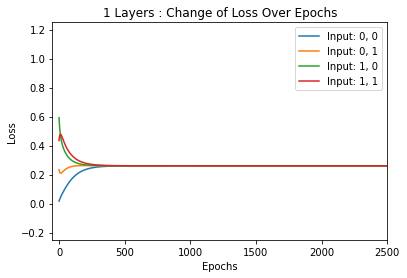

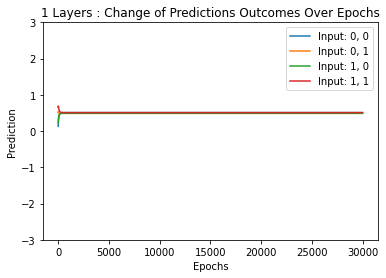

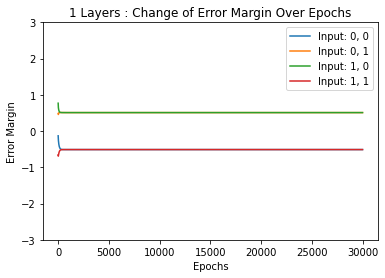

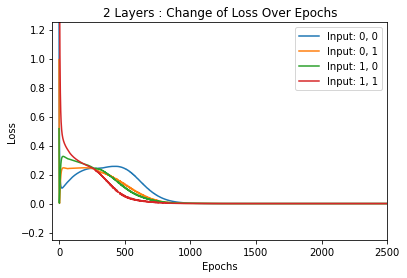

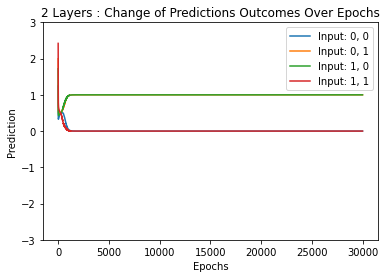

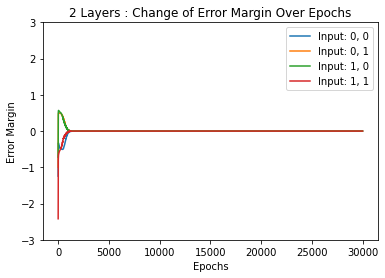

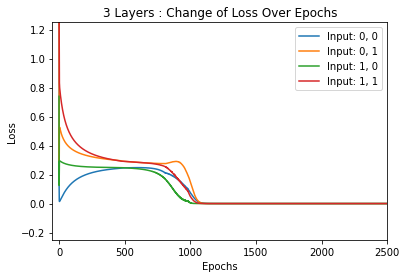

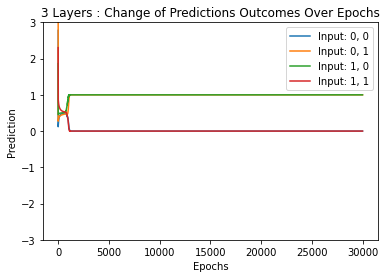

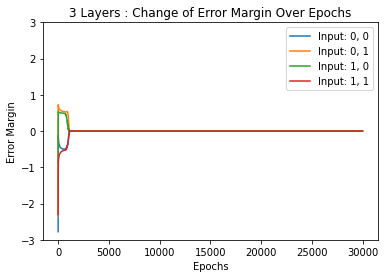

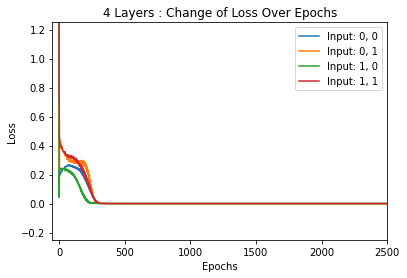

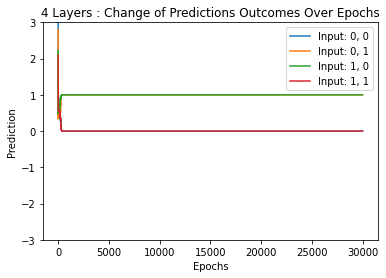

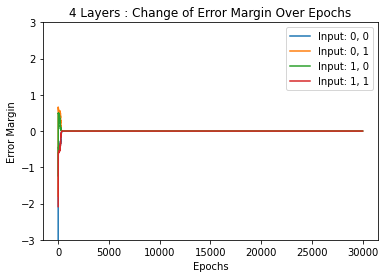

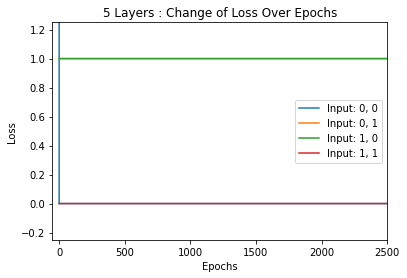

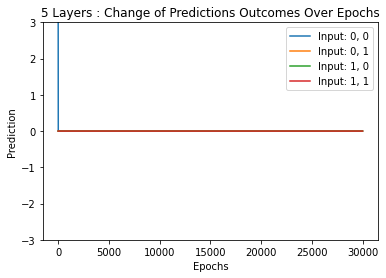

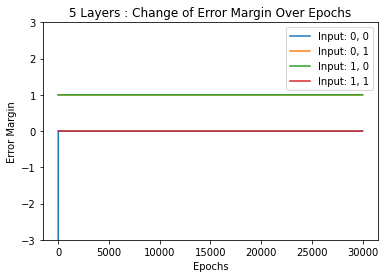

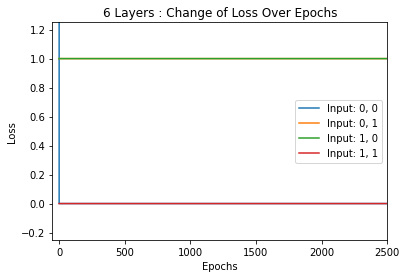

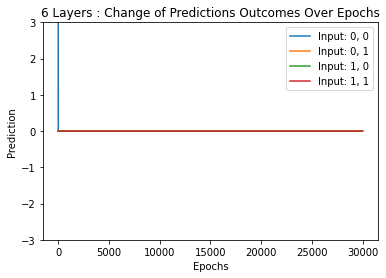

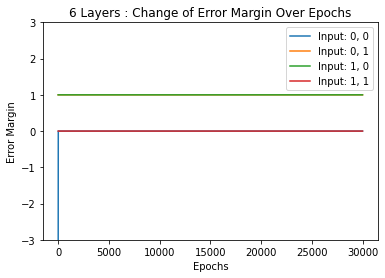

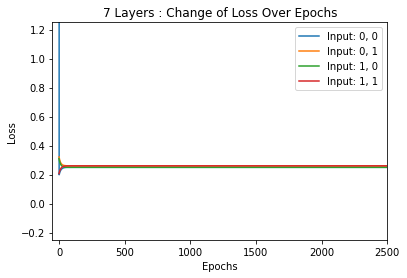

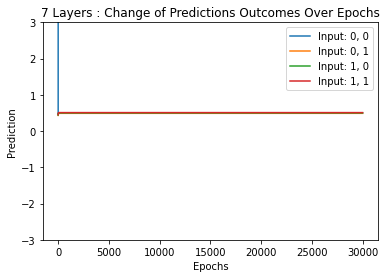

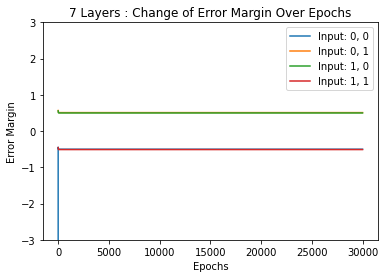

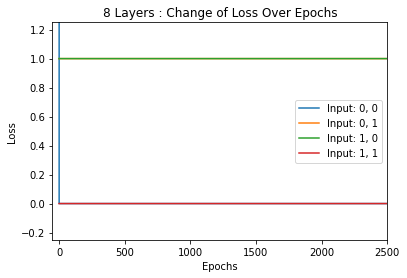

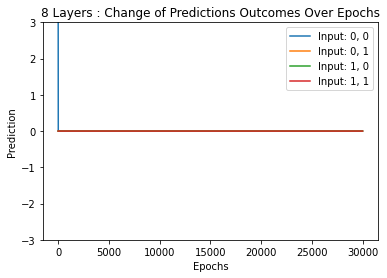

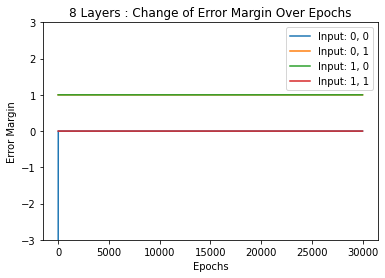

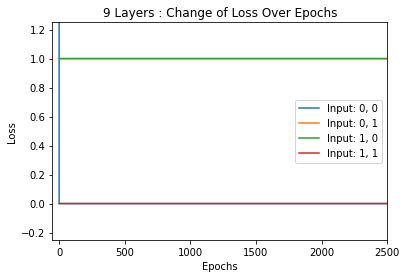

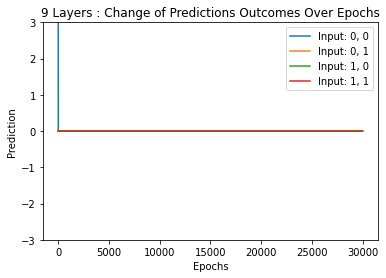

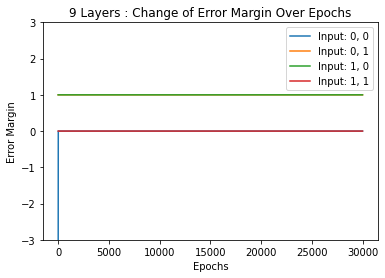

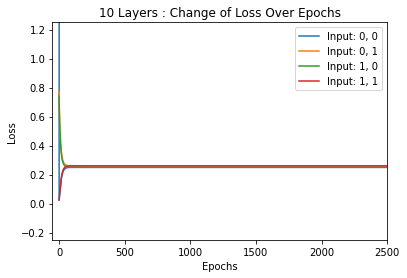

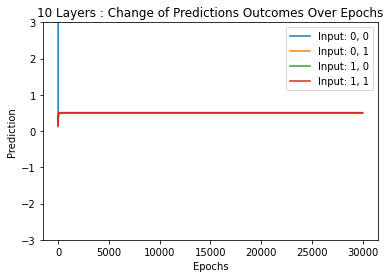

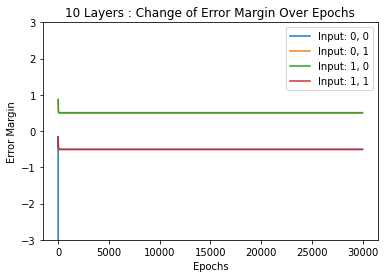

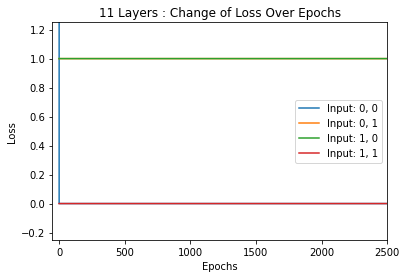

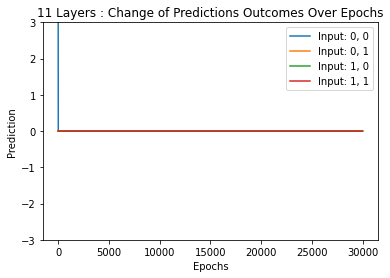

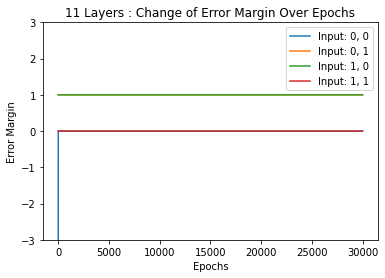

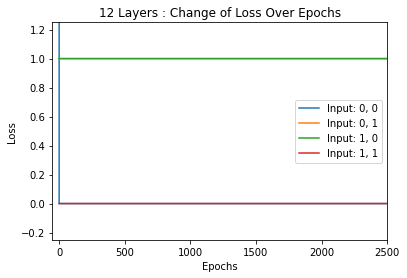

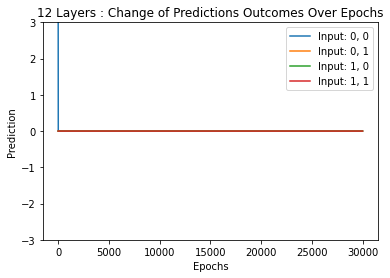

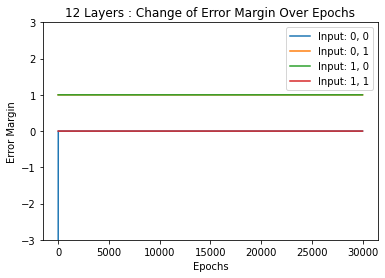

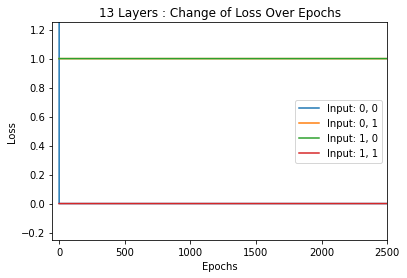

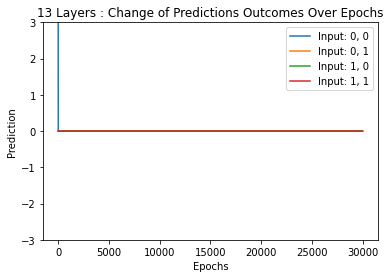

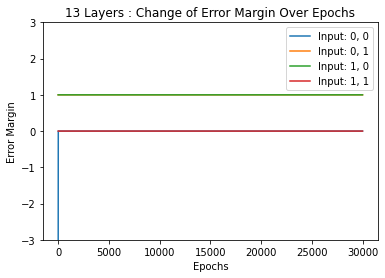

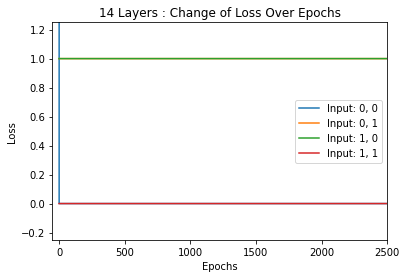

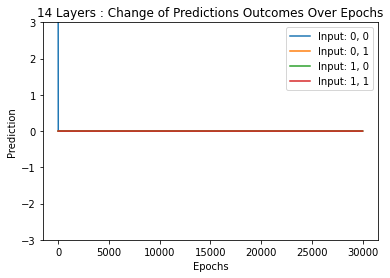

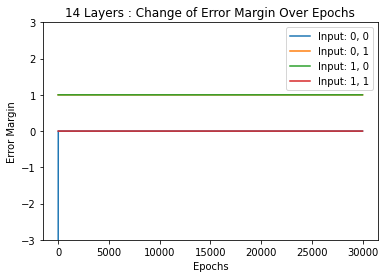

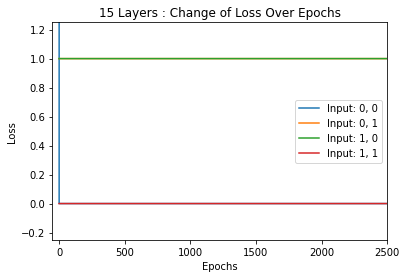

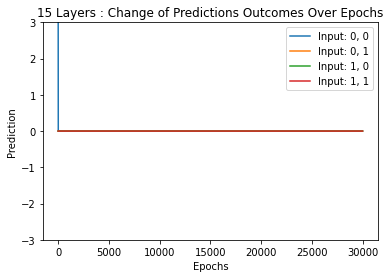

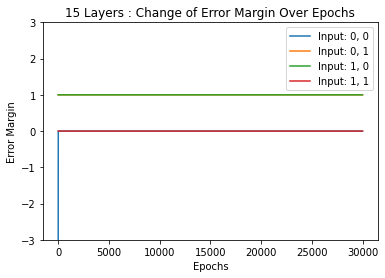

In [6]:
for j in range(1, 16):
    prediction_results, error_results, loss_results, epochs = create_empty_plot_vars()
    weights, biases = generate_weights_and_biases(j)

    optimizer = optim.SGD(weights.copy() + biases.copy(), lr=0.01)

    for epoch in range(num_epochs):
        for i in range(input_data.size(0)):

            x, y = unsqueeze_data(input_data, output_data, i)
            optimizer.zero_grad()

            y_hat = predict(x, weights, biases)

            error = y.data.numpy() - y_hat.data.numpy()
            prediction_results[i].append(y_hat.data.numpy()[0][0])
            error_results[i].append(error[0][0])

            loss = loss_fn(y_hat, y)
            loss.backward()
            optimizer.step()

            # print(f'y_hat: {y_hat}, y: {y}, loss: {loss.item()}')
            loss_results[i].append(loss.item())
        
    
    plot_data(loss_results, f'{j} Layers : Change of Loss Over Epochs',
              'Epochs', 'Loss', f'{j}-layer-loss.png', input_data, dpi=300, lim=True)

    print()
    plot_default(f'{j}-layer-prediction.png', f'{j}-layer-error-margin.png', prediction_results, error_results, input_data, j)